# Hashing and Time Complexity in Search

The goal herein is to explore time complexities of the form $O(n^k)$ where $k$ is in the range $0 \leq k < 1$.
In particular the idea explored will be hashing. We will write some custom hashes and explore the relation between memory and time complexity in look-up. 

In [6]:
class MyHashTable(object):
    """creates a dictionary to perform look-ups i.e. search on randomly generated integers"""
    def __init__(self, size):
        """makes empty array"""
        self.size = size
        self.hashes = []
        for i in range(0, size):
            self.hashes.append([])
        
    def addHash(self, key, entry):
        """adds values to array"""
        myHash = key%self.size
        self.hashes[myHash].append([key, entry])
        
    def getEntryByHash(self, key):
        """retrieves the entry based on provided key"""
        matches = self.hashes[key%self.size]
        for i in range(len(matches)): ## Search over matching hashes
            if matches[i][0] == key:
                return matches[i][1]
    

In [7]:
myTable = MyHashTable(100)

In [8]:
myTable.addHash(137273,0)

In [9]:
myTable.hashes[137273%100]

[[137273, 0]]

In [11]:
myTable.getEntryByHash(137273)

0

In [12]:
import random

def newTable(N_entries, N_hashes):
    """Makes a MyHashTable object"""
    myTable = MyHashTable(N_hashes)
    for i in range(0,N_entries):
        key = random.randint(0,10**6)
        myTable.addHash(key,i)
    return myTable

In [13]:
table0 = newTable(100,100)

In [16]:
table0.hashes ## Bad practice to break abstraction layer, but... I'm gonna do it anyway :P

[[[863900, 23]],
 [[964101, 38]],
 [[299202, 24], [587502, 54]],
 [[73103, 84]],
 [[762904, 90]],
 [[713305, 53]],
 [[624706, 35]],
 [[527007, 3]],
 [[577908, 95]],
 [[558909, 14], [912409, 70]],
 [],
 [],
 [[507412, 31]],
 [],
 [],
 [[221715, 5], [288015, 58], [653315, 63], [107515, 87]],
 [[101016, 47]],
 [],
 [],
 [],
 [],
 [],
 [[290422, 12]],
 [[756423, 64]],
 [],
 [[684325, 22]],
 [],
 [],
 [],
 [[223929, 65]],
 [[988030, 43], [486130, 72]],
 [[583531, 10]],
 [[381832, 89]],
 [[947533, 2], [501533, 45], [200233, 69], [526933, 79]],
 [[137934, 28], [389534, 59]],
 [[477835, 94]],
 [],
 [[43437, 42]],
 [[994038, 29], [937438, 74], [265538, 86]],
 [[737339, 39], [139339, 49]],
 [[883040, 82]],
 [[151441, 88]],
 [[395442, 76], [975142, 80]],
 [],
 [],
 [[623245, 9], [221345, 18], [112145, 71]],
 [[536846, 52], [946, 67], [177946, 73]],
 [],
 [[939748, 44]],
 [[644649, 81]],
 [],
 [[713951, 17], [949151, 55], [2851, 98]],
 [[203952, 6], [427652, 50], [946952, 60]],
 [],
 [],
 [[250155

Note that because we made the table with equal amounts of hashes and entries, in the best case scenario it would be one to one, but for each and every empty hash value, there's a corresponding collision. If you're familiar with hash collisions in cryptographic terms, this is not nearly as detrimental. These collisions just mean that we need to run a conventional $O(n)$ search on a subset of what we'd be searching without a hash table. Fortunately it's nothing like finding a SHA1 collision!

As the amount of memory we allocate to allow for hashed values being stored increases, the run time of our search will approach $O(1)$. In the case that we allow a single hash, we are performing a normal search of time complexity $O(n)$. Between these cases we're looking at time complexities of the form $O(n^k)$ where $k$ is in the range $0 \leq k < 1$. Let's try now to calculate what k is from the ratio N_entries and N_hashes.

In [18]:
## I'm going to be breaking the abstraction barrier a lot... sorry
table0.getEntryByHash(587502)

54

In that key, val pair we searched over a list of 2 items. In general we're only going to be looking at the hashes correspond to non-empty lists. The important factor is the expected length or number of entries in each non-empty list.

In [30]:
countTotal = 0
countHashes = 0
for i in range(len(table0.hashes)):
    if table0.hashes[i]:
        countHashes+=1
        for j in range(len(table0.hashes[i])):
            countTotal+=1
    

In [33]:
countTotal ## A little pedantic perhaps?

100

In [35]:
ratio = countTotal/countHashes
ratio

1.5384615384615385

So this means that the expected length of the list we'll have to search over is a mere ~1.5 entries long. This means that  we're fairly close to constant time look-ups with the ratio of N_entries and N_hashes near 1.

In [63]:
## Lets set N_entries at 10,000 and check it for N_hashes/N_entries = 0.05, 0.1, ... 1.0, 1.05, ... &c.
r_s = [0.05*x for x in range(1,41)]

In [60]:
expR = []
for i in range(len(r_s)):
    N_entries = 10000
    myTable = newTable(N_entries,int(N_entries*r_s[i]))
    countHashes = 0
    for i in range(len(myTable.hashes)):
        if myTable.hashes[i]:
            countHashes+=1
    expR.append(N_entries/countHashes)

In [48]:
import matplotlib.pyplot as plt

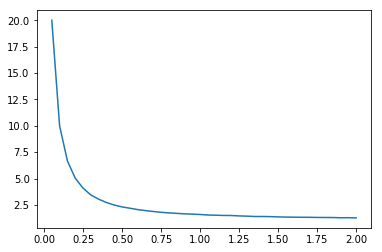

In [64]:
plt.plot(r_s,expR)
plt.show()

In [65]:
import math

In [75]:
log_exp = []
for i in range(len(expR)):
    log_exp.append(math.log(expR[i],10000))

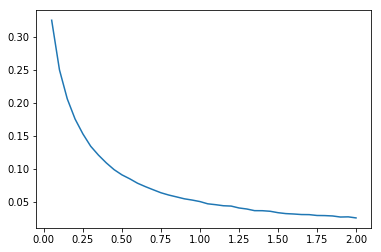

In [76]:
plt.plot(r_s,log_exp)
plt.show()

The figure above gives roughly the $k$ in $O(n^k)$ where the $x$-axis represents the ratio of memory allocated to the number of entries stored in memory. This means that if search is going to be performed on a list of a million keys, a hash table of size 2 million would allow one to perform search in nearly constant time. Incredible!